In [4]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
color = sns.color_palette()
%matplotlib inline

C:\Users\conee\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\conee\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\conee\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Import and explore train_2016 data

In [5]:
# Import training set
train = pd.read_csv('train_2016.csv.zip')
train.shape # 90,275 rows and 3 columns

(90275, 3)

In [6]:
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [7]:
train.dtypes

parcelid             int64
logerror           float64
transactiondate     object
dtype: object

In [8]:
train.describe()

,parcelid,logerror
count,9.027500e+04,90275.000000
mean,1.298466e+07,0.011457
std,2.504510e+06,0.161079
min,1.071174e+07,-4.605000
25%,1.155950e+07,-0.025300
50%,1.254734e+07,0.006000
75%,1.422755e+07,0.039200
max,1.629608e+08,4.737000


In [9]:
train.transactiondate.describe()

count          90275
unique           352
top       2016-07-29
freq             910
Name: transactiondate, dtype: object

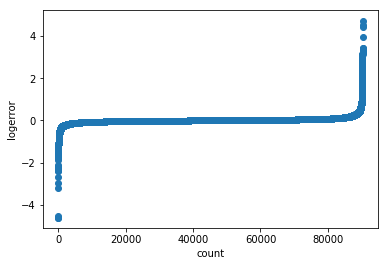

In [10]:
# Explore training set
plt.scatter(range(len(train.index)), np.sort(train.logerror.values))
plt.xlabel('count')
plt.ylabel('logerror')
plt.show()

In [11]:
# Collapse all outliers to be be equal to the 1st and 99th percentile values
ulimit = np.percentile(train.logerror, 99)
llimit = np.percentile(train.logerror, 1)
train['logerror'].loc[train['logerror']>ulimit] = ulimit
train['logerror'].loc[train['logerror']<llimit] = llimit

C:\Users\conee\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


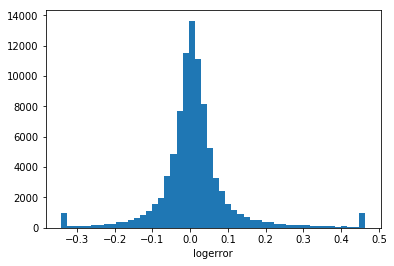

In [12]:
# Plot histogram of logerror values
plt.hist(train.logerror, bins=50)
plt.xlabel('logerror')
plt.show()

In [13]:
ulimit # value for 99th percentile

0.4638819999999963

In [14]:
llimit # value for 1st percentile

-0.34250000000000003

In [15]:
# Convert date column to datetime
train.transactiondate = pd.to_datetime(train.transactiondate)
train['year'] = train.transactiondate.dt.year
train['month'] = train.transactiondate.dt.month
train.head()

,parcelid,logerror,transactiondate,year,month
0,11016594,0.0276,2016-01-01,2016,1
1,14366692,-0.1684,2016-01-01,2016,1
2,12098116,-0.0040,2016-01-01,2016,1
3,12643413,0.0218,2016-01-02,2016,1
4,14432541,-0.0050,2016-01-02,2016,1


In [16]:
train.dtypes

parcelid                    int64
logerror                  float64
transactiondate    datetime64[ns]
year                        int64
month                       int64
dtype: object

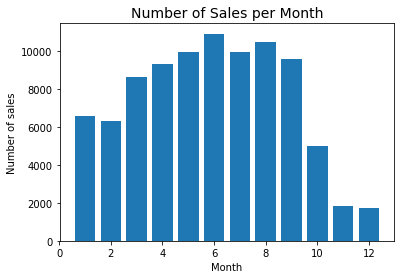

In [17]:
# Plot number of sales per month
tpm = train.month.value_counts()
plt.bar(tpm.index, tpm.values)
plt.xlabel('Month')
plt.ylabel('Number of sales')
plt.title('Number of Sales per Month',size = 14)
plt.show()

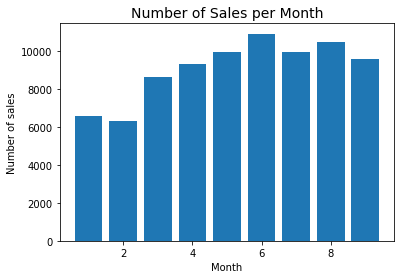

In [18]:
# Plot number of sales per month, excluding months 10-12
plt.bar(tpm.index[0:9], tpm.values[0:9]) # Disregarding months 10-12 because of incomplete data
plt.xlabel('Month')
plt.ylabel('Number of sales')
plt.title('Number of Sales per Month',size = 14)
plt.show()

In [19]:
# Find out the counts for the number of times a property was sold
train.parcelid.value_counts().reset_index().parcelid.value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

### Import and explore properties_2016 data

In [20]:
# Import 2016 properties as props
props = pd.read_csv("properties_2016.csv.zip", low_memory=False)
props.shape # nets 2,985,217 rows and 58 columns

(2985217, 58)

In [21]:
props.head(3).transpose()

,0,1,2
parcelid,10754147,10759547,10843547
airconditioningtypeid,NaN,NaN,NaN
architecturalstyletypeid,NaN,NaN,NaN
basementsqft,NaN,NaN,NaN
bathroomcnt,0,0,0
bedroomcnt,0,0,0
buildingclasstypeid,NaN,NaN,NaN
buildingqualitytypeid,NaN,NaN,NaN
calculatedbathnbr,NaN,NaN,NaN
decktypeid,NaN,NaN,NaN


In [22]:
# Rename columns for brevity
props.rename(columns={'airconditioningtypeid': 'aircon', 'architecturalstyletypeid': 'arch_style', 
                       'basementsqft': 'area_bsmt', 'bathroomcnt': 'num_bath', 'bedroomcnt': 'num_bed', 
                       'buildingclasstypeid': 'type_framing', 'buildingqualitytypeid': 'condition', 
                       'calculatedbathnbr': 'num_bath_calc', 'decktypeid': 'type_deck', 'finishedfloor1squarefeet': 'area_first', 
                       'calculatedfinishedsquarefeet': 'area_living_calc', 'finishedsquarefeet12': 'area_finished', 
                       'finishedsquarefeet13': 'area_perimeter', 'finishedsquarefeet15': 'area_total', 
                       'finishedsquarefeet50': 'area_finished_first', 'finishedsquarefeet6': 'area_living_base', 
                       'fips': 'fips', 'fireplacecnt': 'num_fireplaces', 'fullbathcnt': 'num_bath_full', 
                       'garagecarcnt': 'num_garages', 'garagetotalsqft': 'area_garages', 'hashottuborspa': 'hashottuborspa', 
                       'heatingorsystemtypeid': 'heating', 'latitude': 'latitude', 'longitude': 'longitude', 
                       'lotsizesquarefeet': 'area_lot', 'poolcnt': 'num_pools', 'poolsizesum': 'area_pools', 
                       'pooltypeid10': 'pooltypeid10', 'pooltypeid2': 'pooltypeid2', 'pooltypeid7': 'pooltypeid7', 
                       'propertycountylandusecode': 'zoning_county', 'propertylandusetypeid': 'zoning', 
                       'propertyzoningdesc': 'zoning_property', 'rawcensustractandblock': 'rawcensustractandblock', 
                       'regionidcity': 'city', 'regionidcounty': 'county', 'regionidneighborhood': 'neighborhood', 
                       'regionidzip': 'zip', 'roomcnt': 'num_rooms', 'storytypeid': 'type_stories', 
                       'threequarterbathnbr': 'num_bath_3qtr', 'typeconstructiontypeid': 'material', 'unitcnt': 'num_units', 
                       'yardbuildingsqft17': 'area_patio', 'yardbuildingsqft26': 'area_storage', 'yearbuilt': 'build_year', 
                       'numberofstories': 'num_stories', 'fireplaceflag': 'fireplaceflag', 
                       'structuretaxvaluedollarcnt': 'tax_assessed_structure', 'taxvaluedollarcnt': 'tax_assessed_parcel', 
                       'assessmentyear': 'assessmentyear', 'landtaxvaluedollarcnt': 'tax_assessed_land', 
                       'taxamount': 'tax_total', 'taxdelinquencyflag': 'taxdelinquencyflag', 
                       'taxdelinquencyyear': 'taxdelinquencyyear', 
                       'censustractandblock': 'censustractandblock'}, inplace=True)
props.head()

,parcelid,aircon,arch_style,area_bsmt,num_bath,num_bed,type_framing,condition,num_bath_calc,type_deck,...,num_stories,fireplaceflag,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [23]:
# pd.set_option('precision', 6)
props.describe()

,parcelid,aircon,arch_style,area_bsmt,num_bath,num_bed,type_framing,condition,num_bath_calc,type_deck,...,area_storage,build_year,num_stories,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2.973755e+06,2.973767e+06,12629.000000,1.938488e+06,2.856305e+06,17096.0,...,2647.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,56464.000000,2.910091e+06
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143e+00,3.088949e+00,3.725948,5.784787e+00,2.299263e+00,66.0,...,278.296562,1.964262e+03,1.401464,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754e+00,1.275859e+00,0.501700,1.805352e+00,1.000736e+00,0.0,...,369.731508,2.344132e+01,0.539076,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,4.000000e+00,2.000000e+00,66.0,...,96.000000,1.950000e+03,1.000000,7.480000e+04,1.796750e+05,2.015000e+03,7.483600e+04,2.461070e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,534.000000,2.000000e+00,3.000000e+00,4.000000,7.000000e+00,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.225900e+05,3.060860e+05,2.015000e+03,1.670420e+05,3.991780e+03,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.250000,3.000000e+00,4.000000e+00,4.000000,7.000000e+00,3.000000e+00,66.0,...,320.000000,1.981000e+03,2.000000,1.968890e+05,4.880000e+05,2.015000e+03,3.069180e+05,6.201005e+03,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,2.000000e+01,2.000000e+01,5.000000,1.200000e+01,2.000000e+01,66.0,...,6141.000000,2.015000e+03,41.000000,2.514860e+08,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,99.000000,4.830301e+14


In [24]:
# Find number and percentage of missing values for each column
total = props.isnull().sum().sort_values(ascending=False)
percent = (props.isnull().sum()/props.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing

,Total,Percent
type_stories,2983593,0.999456
area_bsmt,2983589,0.999455
area_storage,2982570,0.999113
fireplaceflag,2980054,0.998270
arch_style,2979156,0.997970
material,2978470,0.997740
area_perimeter,2977545,0.997430
type_framing,2972588,0.995769
type_deck,2968121,0.994273
area_living_base,2963216,0.992630


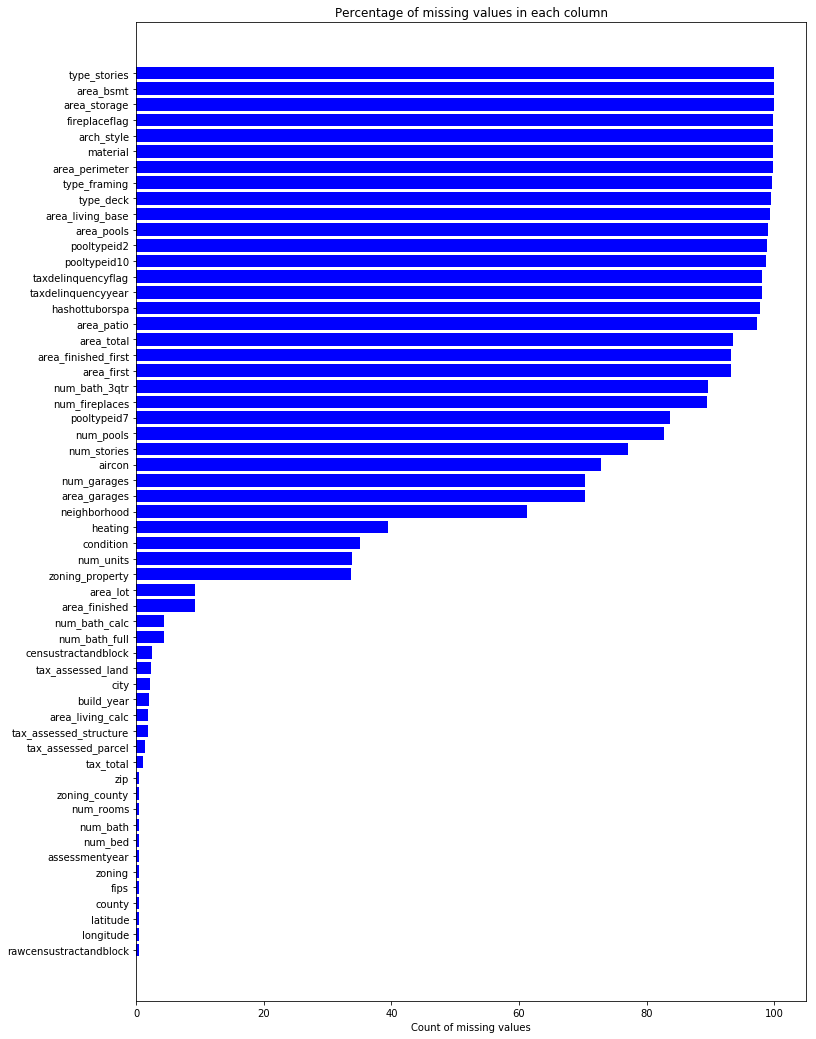

In [25]:
# Barplot of missing value percentages by column
missing = props.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_count']
missing = missing.loc[missing['missing_count']>0]
missing = missing.sort_values(by='missing_count')
missing

ind = np.arange(missing.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing.missing_count.values*100.0/props.shape[0], color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Percentage of missing values in each column")
plt.show()

In [26]:
# Counts for each heating system type id
props.heating.value_counts()

# There are 1167379 missing values for heating

2.0     1156830
7.0      595453
6.0       27480
24.0      21107
20.0       3216
13.0       1342
18.0        586
1.0         262
14.0         41
10.0         39
12.0         25
11.0         16
21.0          3
19.0          1
Name: heating, dtype: int64

In [27]:
# Counts for each property land use type id
props.zoning.value_counts()

261.0    2148362
266.0     481067
246.0     114888
269.0      61469
263.0      58438
248.0      40325
247.0      40022
31.0        9462
265.0       9421
47.0        4314
260.0       2754
267.0       1817
275.0       1201
264.0        204
270.0         36
Name: zoning, dtype: int64

In [28]:
# Counts for each air conditioning type id
props.aircon.value_counts()

1.0     742364
13.0     58457
5.0       8795
11.0      1818
12.0        59
9.0         19
3.0          7
Name: aircon, dtype: int64

### Merge train_2016.csv and properties_2016.csv
##### Reexplore items above on merged data

In [29]:
df = train.merge(props)

In [30]:
pd.set_option('display.max_rows', 60)
df.head().transpose()

,0,1,2,3,4
parcelid,11016594,14366692,12098116,12643413,14432541
logerror,0.0276,-0.1684,-0.004,0.0218,-0.005
transactiondate,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-02 00:00:00,2016-01-02 00:00:00
year,2016,2016,2016,2016,2016
month,1,1,1,1,1
aircon,1,NaN,1,1,NaN
arch_style,NaN,NaN,NaN,NaN,NaN
area_bsmt,NaN,NaN,NaN,NaN,NaN
num_bath,2,3.5,3,2,2.5
num_bed,3,4,2,2,4


In [31]:
df.dtypes

parcelid                           int64
logerror                         float64
transactiondate           datetime64[ns]
year                               int64
month                              int64
aircon                           float64
arch_style                       float64
area_bsmt                        float64
num_bath                         float64
num_bed                          float64
type_framing                     float64
condition                        float64
num_bath_calc                    float64
type_deck                        float64
area_first                       float64
area_living_calc                 float64
area_finished                    float64
area_perimeter                   float64
area_total                       float64
area_finished_first              float64
area_living_base                 float64
fips                             float64
num_fireplaces                   float64
num_bath_full                    float64
num_garages     

In [32]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing

,Total,Percent
type_framing,90259,0.999823
area_perimeter,90242,0.999634
area_bsmt,90232,0.999524
type_stories,90232,0.999524
area_storage,90180,0.998948
fireplaceflag,90053,0.997541
arch_style,90014,0.997109
material,89976,0.996688
area_living_base,89854,0.995336
type_deck,89617,0.992711


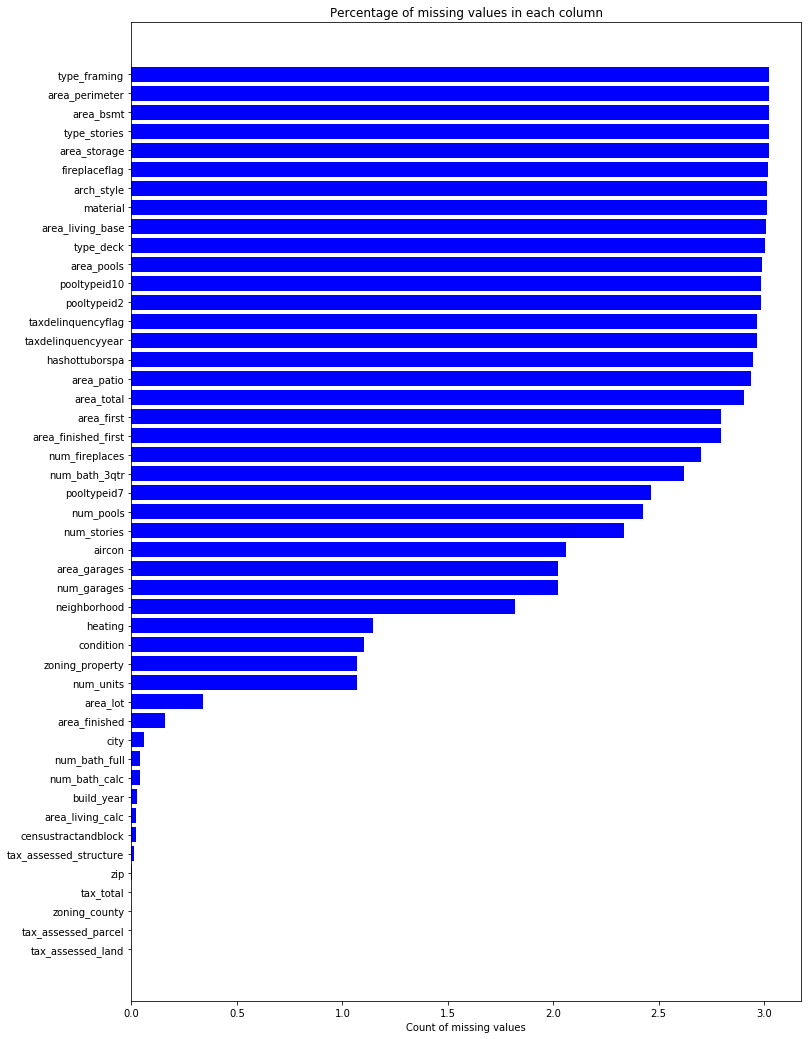

In [33]:
missing = df.isnull().sum(axis=0).reset_index()
missing.columns = ['column_name', 'missing_count']
missing = missing.loc[missing['missing_count']>0]
missing = missing.sort_values(by='missing_count')
# missing

ind = np.arange(missing.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(ind, missing.missing_count.values*100.0/props.shape[0], color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Percentage of missing values in each column")
plt.show()

In [34]:
# columns with more than 25% missing values
df.isnull().sum()[df.isnull().sum()/df.shape[0]>.25].index

Index(['aircon', 'arch_style', 'area_bsmt', 'type_framing', 'condition',
       'type_deck', 'area_first', 'area_perimeter', 'area_total',
       'area_finished_first', 'area_living_base', 'num_fireplaces',
       'num_garages', 'area_garages', 'hashottuborspa', 'heating', 'num_pools',
       'area_pools', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'zoning_property', 'neighborhood', 'type_stories', 'num_bath_3qtr',
       'material', 'num_units', 'area_patio', 'area_storage', 'num_stories',
       'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear'],
      dtype='object')

Start creating groups of like items and compare missing values (e.g. anything with zoning, living area, etc.)

In [35]:
# Living area columns
df_living = df[['area_first','area_living_calc','area_finished','area_perimeter','area_total',
                'area_finished_first','area_living_base']]
df_living.head()

,area_first,area_living_calc,area_finished,area_perimeter,area_total,area_finished_first,area_living_base
0,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN
1,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN
2,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN
3,NaN,839.0,839.0,NaN,NaN,NaN,NaN
4,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN


In [36]:
# Drop rows with all NA values
df_living = df_living.dropna(axis=0, how='all')
df_living.head()
df_living.shape

(89614, 7)

In [37]:
# All rows in area_finished that are not NaN are equal to area_living_calc. 
# Therefore, area_finished will be replaced with values in area_living_calc and then a_l_c will be removed from the df.

df_living = df_living.rename(columns={'area_living_calc': 'area_living'})
df_living = df_living.drop(['area_first','area_perimeter','area_total','area_finished_first',
                            'area_living_base','area_finished'], axis=1)
df_living.head()

,area_living
0,1684.0
1,2263.0
2,2217.0
3,839.0
4,2283.0


In [38]:
df.head()

,parcelid,logerror,transactiondate,year,month,aircon,arch_style,area_bsmt,num_bath,num_bed,...,num_stories,fireplaceflag,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,2016,1,1.0,NaN,NaN,2.0,3.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,2016,1,NaN,NaN,NaN,3.5,4.0,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,2016,1,1.0,NaN,NaN,3.0,2.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,2016,1,1.0,NaN,NaN,2.0,2.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,2016,1,NaN,NaN,NaN,2.5,4.0,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [39]:
# Merge cleaned living area subset into df
df = df.merge(df_living, left_index=True, right_index=True)
df = df.drop(['area_first','area_perimeter','area_total','area_finished_first',
                            'area_living_base','area_finished','area_living_calc'], axis=1)

In [40]:
# Drop all columns with more than 25% missing values: df1 (may want to revisit df to see which other values can be filled in)
df1 = df.drop(['aircon', 'arch_style', 'area_bsmt', 'type_framing', 'condition',
       'type_deck', 'num_fireplaces', 'num_garages', 'area_garages',
       'hashottuborspa', 'heating', 'num_pools', 'area_pools', 'pooltypeid10',
       'pooltypeid2', 'pooltypeid7', 'zoning_property', 'neighborhood',
       'type_stories', 'num_bath_3qtr', 'material', 'num_units', 'area_patio',
       'area_storage', 'num_stories', 'fireplaceflag', 'taxdelinquencyflag',
       'taxdelinquencyyear'], axis=1)

In [41]:
df1.head()
df1.shape

(89614, 28)

In [42]:
# Review missing counts for df1
total1 = df1.isnull().sum().sort_values(ascending=False)
percent1 = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing1 = pd.concat([total1, percent1], axis=1, keys=['Total','Percent'])
missing1

,Total,Percent
area_lot,9822,0.109603
city,1703,0.019004
num_bath_full,530,0.005914
num_bath_calc,530,0.005914
censustractandblock,233,0.002600
build_year,108,0.001205
tax_assessed_structure,77,0.000859
zip,17,0.000190
tax_total,6,0.000067
tax_assessed_parcel,1,0.000011


In [43]:
# Calculate missing values in tax_assessed_structure
df1.tax_assessed_structure = df1.tax_assessed_parcel - df1.tax_assessed_land

In [44]:
df1[df1.tax_assessed_structure==0] # Verify how many properties have no structure assessed

,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,num_bath_calc,fips,num_bath_full,...,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,censustractandblock,area_living
101,14324521,-0.199700,2016-01-04,2016,1,4.0,3.0,4.0,6059.0,4.0,...,96957.0,7.0,1960.0,0.0,3020077.0,2015.0,3020077.0,74674.70,6.059063e+13,2921.0
319,12966592,-0.046000,2016-01-05,2016,1,1.0,2.0,1.0,6037.0,1.0,...,96273.0,0.0,1900.0,0.0,382492.0,2015.0,382492.0,8207.18,6.037430e+13,949.0
592,12222991,-0.216900,2016-01-05,2016,1,2.0,2.0,2.0,6037.0,2.0,...,96028.0,0.0,1948.0,0.0,114755.0,2015.0,114755.0,3873.86,6.037600e+13,847.0
2447,13991826,-0.291700,2016-01-14,2016,1,0.0,0.0,NaN,6059.0,NaN,...,97023.0,7.0,1954.0,0.0,163196.0,2015.0,163196.0,5333.58,6.059088e+13,1462.0
4060,12130228,0.043100,2016-01-21,2016,1,2.0,2.0,2.0,6037.0,2.0,...,96267.0,0.0,1949.0,0.0,1325974.0,2015.0,1325974.0,26130.86,6.037430e+13,1544.0
4098,12531057,-0.121000,2016-01-21,2016,1,1.0,1.0,1.0,6037.0,1.0,...,96237.0,0.0,1925.0,0.0,596688.0,2015.0,596688.0,7186.04,6.037577e+13,778.0
5113,11547227,-0.342500,2016-01-26,2016,1,1.0,2.0,1.0,6037.0,1.0,...,96127.0,0.0,1953.0,0.0,1708466.0,2015.0,1708466.0,20776.89,6.037273e+13,780.0
6469,12144604,0.089800,2016-01-29,2016,1,3.0,5.0,3.0,6037.0,3.0,...,96268.0,0.0,1938.0,0.0,1291009.0,2015.0,1291009.0,28935.91,6.037432e+13,3419.0
8778,11668168,-0.342500,2016-02-11,2016,2,2.0,2.0,2.0,6037.0,2.0,...,96120.0,0.0,1942.0,0.0,1959075.0,2015.0,1959075.0,47862.11,6.037263e+13,1466.0
8958,11545770,-0.342500,2016-02-11,2016,2,2.0,1.0,2.0,6037.0,2.0,...,96127.0,0.0,1946.0,0.0,1300474.0,2015.0,1300474.0,25961.19,6.037274e+13,952.0


In [45]:
# Missing value for tax_assessed_parcel is same row as missing value for tax_assessed_land - delete this row
df1 = df1[pd.notnull(df1['tax_assessed_land'])]

# Cols with missing value for tax total to be removed, there is no way to know what this value is
df1 = df1[pd.notnull(df1['tax_total'])]

In [46]:
# Try to find how many of each type of zoning_county for zoning=266
df1[['zoning_county','zoning']].groupby(by='zoning').describe()

zoning_county                    
               count unique   top   freq
zoning                                  
31.0              17      5  1720      7
47.0               1      1  1200      1
246.0           2373      9  0200   2150
247.0            627      8  0300    576
248.0            867      8  0400    743
260.0             26      2  010V     23
261.0          60357     19  0100  30800
263.0             69      3  0700     54
264.0             11      2  012E      7
265.0            356      1  1128    356
266.0          22635      9  010C  10240
267.0             28      1  010F     28
269.0           2193      2  010D   2192
275.0             46      1  1117     46

In [47]:
# Replace zoning_county=NaN with 010C as it's the most common
df1.loc[df1.zoning_county.isnull(),'zoning_county']='010C'

In [48]:
# Sort lat/long and ffill missing city names
location = df1[['city','latitude','longitude']]
location = location.sort_values(['latitude','longitude']).fillna(method='ffill')

In [49]:
df1 = df1.sort_values(['latitude','longitude'])
location = location.sort_values(['latitude','longitude'])
df1.update(location)
df1.head()

,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,num_bath_calc,fips,num_bath_full,...,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,censustractandblock,area_living
4176,12658092,0.0507,2016-01-21,2016,1,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1978.0,165947.0,327635.0,2015.0,161688.0,5433.63,6.037599e+13,1703.0
11374,12659026,-0.1661,2016-02-24,2016,2,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1920.0,300894.0,545689.0,2015.0,244795.0,7949.83,6.037599e+13,865.0
60917,12659032,-0.0471,2016-07-29,2016,7,3.0,3.0,3.0,6037.0,3.0,...,96207.0,0.0,1996.0,265712.0,398565.0,2015.0,132853.0,6174.19,6.037599e+13,1500.0
38326,12658206,-0.0182,2016-05-24,2016,5,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1964.0,89781.0,139956.0,2015.0,50175.0,3036.02,6.037599e+13,1422.0
72995,12659124,0.0421,2016-09-02,2016,9,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1965.0,103700.0,271000.0,2015.0,167300.0,5934.02,6.037599e+13,902.0


In [50]:
# Review missing counts for df1
total1 = df1.isnull().sum().sort_values(ascending=False)
percent1 = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing1 = pd.concat([total1, percent1], axis=1, keys=['Total','Percent'])
missing1

,Total,Percent
area_lot,9818,0.109567
num_bath_calc,530,0.005915
num_bath_full,530,0.005915
censustractandblock,233,0.002600
build_year,108,0.001205
zip,17,0.000190
area_living,0,0.000000
longitude,0,0.000000
logerror,0,0.000000
transactiondate,0,0.000000


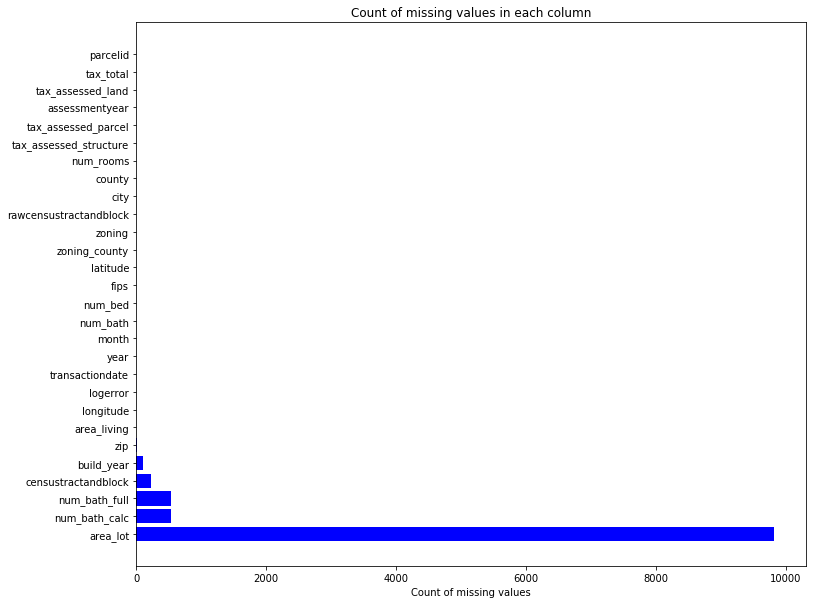

In [51]:
# Again, barplot of missing values (count) by column
ind = np.arange(missing1.shape[0])
width = 0.5
fig, ax = plt.subplots(figsize=(12,10))
rects = ax.barh(ind, missing1['Total'].values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing1.index, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Count of missing values in each column")
plt.show()

In [52]:
# Sort by city and zipcode and forward fill missing zip values
zipcode = df1[['city','zip']].sort_values(['city','zip'])
zipcode = zipcode.zip.ffill()

In [53]:
# Update df1 without missing zip values
df1.update(zipcode)
df1.head()

,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,num_bath_calc,fips,num_bath_full,...,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,censustractandblock,area_living
4176,12658092,0.0507,2016-01-21,2016,1,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1978.0,165947.0,327635.0,2015.0,161688.0,5433.63,6.037599e+13,1703.0
11374,12659026,-0.1661,2016-02-24,2016,2,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1920.0,300894.0,545689.0,2015.0,244795.0,7949.83,6.037599e+13,865.0
60917,12659032,-0.0471,2016-07-29,2016,7,3.0,3.0,3.0,6037.0,3.0,...,96207.0,0.0,1996.0,265712.0,398565.0,2015.0,132853.0,6174.19,6.037599e+13,1500.0
38326,12658206,-0.0182,2016-05-24,2016,5,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1964.0,89781.0,139956.0,2015.0,50175.0,3036.02,6.037599e+13,1422.0
72995,12659124,0.0421,2016-09-02,2016,9,2.0,2.0,2.0,6037.0,2.0,...,96207.0,0.0,1965.0,103700.0,271000.0,2015.0,167300.0,5934.02,6.037599e+13,902.0


In [54]:
# Drop 'censustractandblock' if not critical
#df1 = df1.drop(['censustractandblock'], axis = 1)

In [55]:
# Remove num_bath_full and num_bath_calc
df1.drop(['num_bath_full', 'num_bath_calc'], axis=1, inplace=True)

In [56]:
df1[df1.build_year.isnull()].shape

(108, 26)

In [57]:
# Drop rest of NA values for clean set to continue (can revert to df1 if necessary)
#df_clean = df1[(df1.build_year.notnull()) & (df1.censustractandblock.notnull()) & df1.area_lot.notnull()]
df_clean = df1.dropna()
df_clean.head()

,parcelid,logerror,transactiondate,year,month,num_bath,num_bed,fips,latitude,longitude,...,zip,num_rooms,build_year,tax_assessed_structure,tax_assessed_parcel,assessmentyear,tax_assessed_land,tax_total,censustractandblock,area_living
4176,12658092,0.0507,2016-01-21,2016,1,2.0,2.0,6037.0,33339295.0,-118331034.0,...,96207.0,0.0,1978.0,165947.0,327635.0,2015.0,161688.0,5433.63,6.037599e+13,1703.0
11374,12659026,-0.1661,2016-02-24,2016,2,2.0,2.0,6037.0,33340045.0,-118325943.0,...,96207.0,0.0,1920.0,300894.0,545689.0,2015.0,244795.0,7949.83,6.037599e+13,865.0
60917,12659032,-0.0471,2016-07-29,2016,7,3.0,3.0,6037.0,33340134.0,-118325615.0,...,96207.0,0.0,1996.0,265712.0,398565.0,2015.0,132853.0,6174.19,6.037599e+13,1500.0
38326,12658206,-0.0182,2016-05-24,2016,5,2.0,2.0,6037.0,33340239.0,-118324732.0,...,96207.0,0.0,1964.0,89781.0,139956.0,2015.0,50175.0,3036.02,6.037599e+13,1422.0
72995,12659124,0.0421,2016-09-02,2016,9,2.0,2.0,6037.0,33340508.0,-118324950.0,...,96207.0,0.0,1965.0,103700.0,271000.0,2015.0,167300.0,5934.02,6.037599e+13,902.0


In [58]:
# Verify data is clean
df_clean.isnull().sum().sort_values(ascending=False)

area_living               0
censustractandblock       0
logerror                  0
transactiondate           0
year                      0
month                     0
num_bath                  0
num_bed                   0
fips                      0
latitude                  0
longitude                 0
area_lot                  0
zoning_county             0
zoning                    0
rawcensustractandblock    0
city                      0
county                    0
zip                       0
num_rooms                 0
build_year                0
tax_assessed_structure    0
tax_assessed_parcel       0
assessmentyear            0
tax_assessed_land         0
tax_total                 0
parcelid                  0
dtype: int64

In [59]:
df_clean.to_csv('df_clean.csv')